# Classification of IRIS-data with support vector machines (SVP) and logistic regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras as ks
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-05-27 13:22:37.482705: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 13:22:37.953576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 13:22:37.957291: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 13:22:39.594610: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load and preprocess data

In [2]:
# Load features and targets
iris_features = load_iris(as_frame=True)['data']
iris_target = pd.DataFrame(load_iris(as_frame=True)['target'])
# Check for missing data
print(f'Any missing data in features data? Answer: {iris_features.isna().any().any()}')
print(f'Any missing data in target data? Answer: {iris_target.isna().any().any()}')
# Unless scaling is not necessary for logistic regression, it may for LASSO or RIDGE
# Normalizing features (all features are interval variables)
scaler = StandardScaler()
iris_features_scaled = pd.DataFrame(scaler.fit_transform(iris_features), columns=iris_features.columns)
# No normalization is applied to target, as this column is nominal

Any missing data in features data? Answer: False
Any missing data in target data? Answer: False


## Logistical regression to classify Iris data

In [3]:
# Split data in training and test data set
X_train, X_test, y_train, y_test = train_test_split(iris_features_scaled, iris_target)
# Create instance of logistic regression
log_regress = LogisticRegression(multi_class='multinomial')
# Calculate regression on training data set
log_regress.fit(X_train, y_train.to_numpy().ravel())
# Make predictions on test data set
log_regress.score(X_test, y_test)

0.9736842105263158

In [4]:
# Estimate performance of logistic regression for various train/test-splits via cross-validation
cross_result = cross_validate(log_regress, X=iris_features_scaled, y=iris_target.to_numpy().ravel(), 
               scoring='accuracy', cv=20)
# Calculate mean and standard-deviation of score on test-data
cross_test_mean = cross_result['test_score'].mean()
cross_test_std = cross_result['test_score'].std()
# Print these results
print(f'The logistic regression scores an accuracy of {cross_test_mean:.0%} +/- {cross_test_std:.0%}\
 on test data set') 

The logistic regression scores an accuracy of 95% +/- 8% on test data set


## Support vector machine (SVM)

### 1. Linear SVM 

In [5]:
# Data is already scaled (important as metrics are calculated)
svm_linear = LinearSVC(dual=False, C=3)
# Fit Data to train data set
svm_linear.fit(X_train, y_train.to_numpy().ravel())
# receive score on test data set
svm_linear.score(X_test, y_test)

0.9473684210526315

In [6]:
# Estimate performance of Linear SVM via cross-validation
cross_result_linear_svm = cross_validate(svm_linear, X=iris_features_scaled, 
                                         y=iris_target.to_numpy().ravel(), 
                                         scoring='accuracy', cv=20)
# Calculate mean and standard-deviation of score on test-data
cross_test_mean_linear_svm = cross_result_linear_svm['test_score'].mean()
cross_test_std_linear_svm = cross_result_linear_svm['test_score'].std()
# Print the results
print(f'The linear SVM scores an accuracy of {cross_test_mean_linear_svm:.0%} +/- \
{cross_test_std_linear_svm:.0%} on test data set.\nMore generatlization (smaller "C" in LinearSVC) \
leads to worse results, when C<0.5. Less generalization improves from accuracy .94 to .95 accuracy, \
when C>=3 (default is 1.0).\nConsequently C=3.0 was chosen.') 

The linear SVM scores an accuracy of 95% +/- 8% on test data set.
More generatlization (smaller "C" in LinearSVC) leads to worse results, when C<0.5. Less generalization improves from accuracy .94 to .95 accuracy, when C>=3 (default is 1.0).
Consequently C=3.0 was chosen.


## 2. non-linear SVM

In [7]:
# Create instance of support vector classifier
svm = SVC(C=1.0, kernel='rbf', gamma=0.1)
# Examples of training and scoring on test-data set
svm.fit(X_train, y_train.to_numpy().ravel())
svm.score(X_test, y_test.to_numpy().ravel())

0.9736842105263158

In [8]:
# Estimate performance of SVM with kernel "radial basis function" via cross-validation
cross_result_svm = cross_validate(svm, X=iris_features_scaled, y=iris_target.to_numpy().ravel(), 
                                  scoring='accuracy', cv=20)
# Calculate mean and standard-deviation of score on test-data
cross_test_mean_svm = cross_result_svm['test_score'].mean()
cross_test_std_svm = cross_result_svm['test_score'].std()
# Print the results
print(f'The SVC with "rbf"-kernel scores an accuracy \
of {cross_test_mean_svm:.0%} +/- {cross_test_std_svm:.0%} on test data set.\n\
Modifying regularization worsens the result, as varying "C" to lower or bigger values of default=1\
worsense the result. Thus C=1.0 was chosen.\nParameter "gamma=0.1" reproduced the performance of the \
choice "gamme="scale" and no other gamme could be found to perform better.')

The SVC with "rbf"-kernel scores an accuracy of 97% +/- 6% on test data set.
Modifying regularization worsens the result, as varying "C" to lower or bigger values of default=1worsense the result. Thus C=1.0 was chosen.
Parameter "gamma=0.1" reproduced the performance of the choice "gamme="scale" and no other gamme could be found to perform better.


In [9]:
# Create instance of support vector classifier
svm_poly = SVC(C=1, kernel='poly', degree=3, coef0=0.8)
# Examples of training and scoring on test-data set
svm_poly.fit(X_train, y_train.to_numpy().ravel())
svm_poly.score(X_test, y_test.to_numpy().ravel())

1.0

In [10]:
# Estimate performance of SVM with kernel "poly, degree=3" via cross-validation
cross_result_svm_poly = cross_validate(svm_poly, X=iris_features_scaled, y=iris_target.to_numpy().ravel(), 
                                  scoring='accuracy', cv=20)
# Calculate mean and standard-deviation of score on test-data
cross_test_mean_svm_poly = cross_result_svm_poly['test_score'].mean()
cross_test_std_svm_poly = cross_result_svm_poly['test_score'].std()
# Print the results
print(f'The SVC with "poly, degree=3"-kernel scores an accuracy \
of {cross_test_mean_svm_poly:.0%} +/- {cross_test_std_svm_poly:.0%} on test data set.\n\
Again default regularization couldn\'t be improved by modifying "C". Offset parameter "coef0" \
showed big influence and was optimized for greatest accuracy on test data set during cross-validation.\n\
After this "degree" was of weak influx and remaind on default (degree=3).\n\
After this optimization polynominal kernel shows same performance as "rbf"-kernel.')

The SVC with "poly, degree=3"-kernel scores an accuracy of 97% +/- 6% on test data set.
Again default regularization couldn't be improved by modifying "C". Offset parameter "coef0" showed big influence and was optimized for greatest accuracy on test data set during cross-validation.
After this "degree" was of weak influx and remaind on default (degree=3).
After this optimization polynominal kernel shows same performance as "rbf"-kernel.


# kNN-classifier

In a previous examination of iris-data set a kNN-classifier was optimized.
It achieved about 96 % accuracy.

# Neuronal net

For comparison, a neuronal net is trained and evaluated.

In [11]:
# Neuronal net will have one hot encoding output. Dummy-columns needed for targets
iris_target_dummies = pd.get_dummies(iris_target, prefix='cat', columns=['target'])
# Create train/test-split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(iris_features_scaled, iris_target_dummies)

In [12]:
# Define net as Sequential and layers as follows
net = ks.Sequential()
net.add(ks.layers.Dense(7, activation='tanh', input_shape=(4, ))) # First hidden layer
net.add(ks.layers.Dense(7, activation='tanh')) # second hidden layer
net.add(ks.layers.Dense(3, activation='softmax'))# Output layer
net.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

# List to store loss of every epoch on traning data in
history_list = []
# List to store accuracy on test data in
accuracy_list = []

In [130]:
# Loop over training data - one epoch per loop, evaluate with test data each loop
for i in range(300):
    history = net.fit(X_train_nn, y_train_nn, epochs=1, verbose=0) # Training on training data
    history_list += history.history['loss'] # store information about loss on training data
    [_, accuracy] = net.evaluate(X_test_nn, y_test_nn, verbose=0) # evaluate on test data and store accuracy information
    accuracy_list.append(accuracy) 

Text(0.5, 1.0, 'NN performance')

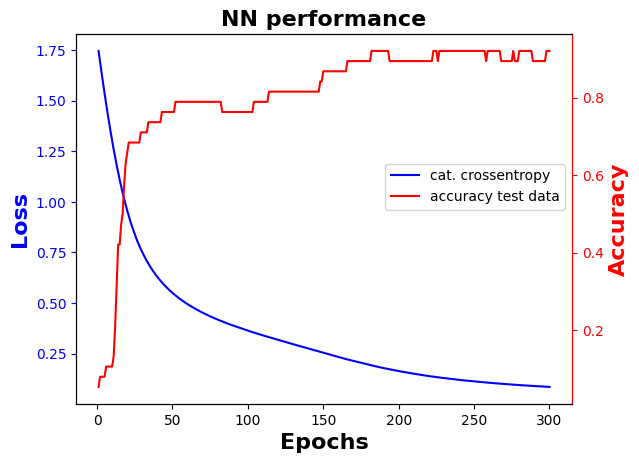

In [144]:
# Plot loss during training, and accuracy on test batch after each epoch

# Define fontdictionaries
font_blue = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 16,
        }
font_red = {'family': 'sans-serif',
        'color':  'red',
        'weight': 'bold',
        'size': 16,
        }
font_black = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

fig, ax = plt.subplots()
# plot loss function, note no. of epoch needs to begin with 1
ax.plot([i for i in range(1, len(history_list)+1)], history_list, color='blue', label='cat. crossentropy')
ax.set_xlabel('Epochs', fontdict=font_black)
# Create colored y-axis and labels
ax.set_ylabel('Loss', fontdict=font_blue)
ax.spines['left'].set_color('blue')
ax.tick_params(axis='y', colors='blue')
# Create second axis, charing x-axis (epochs)
ax2 = ax.twinx()
# Plot accuracy on test data 
ax2.plot([i for i in range(1, len(accuracy_list)+1)], accuracy_list, color='red', label='accuracy test data')
# Colored y-axis and labels
ax2.set_ylabel('Accuracy', fontdict=font_red)
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
# Create legend and title
fig.legend(loc='lower right', bbox_to_anchor=(0.9, 0.5))
plt.title('NN performance', fontdict=font_black)

In [113]:
# Crossvalidation of neuronal net, using stratified k-fold crossvalidation, as data set is small 
# and therefore bigger variance in test data sets is expected
# List to store scores in
scores = []
stratified_split = StratifiedKFold(8, shuffle=True)
# Note that stratified split can only be done on multiclass column "iris_target" and not on dummy-columns
for i, (train, test) in enumerate(stratified_split.split(iris_features_scaled, iris_target)):
    # Obtain training/test data based on returned indices
    X_train = iris_features_scaled.iloc[train, :]
    X_test = iris_features_scaled.iloc[test, :]
    y_train = iris_target_dummies.iloc[train, :]
    y_test = iris_target_dummies.iloc[test, :]
    # Fit neuronal net to this training data
    net.fit(X_train, y_train, epochs=500, verbose=0)
    # Evaluate net on test data and save score
    scores.append(net.evaluate(X_test, y_test))

1/1 [==============================] - 0s 26ms/step - loss: 0.0090 - accuracy: 1.0000


In [114]:
df_scores = pd.DataFrame(scores, columns=['loss', 'accuracy'])
print(f'After cross-validation and hyperparameter tuning the neuronal net achieves\
 an accuracy of: {df_scores.accuracy.mean():.0%} +/- {df_scores.accuracy.std():.0%}.\
 \nThis is comparable to non-linear SVM, while variation tends to be smaller with neuronal nets.')

After cross-validation and hyperparameter tuning the neuronal net achieves an accuracy of: 97% +/- 5%. 
This is comparable to non-linear SVM, while variation tends to be smaller with neuronal nets.
